# WeatherPy
----

* Based on the analysis below comparing maximum temperature and latitude, the points form a parabolic shape with a local maximum between 0 to 20 degrees latitude (depending on the randomly generated cities). This means that as you approach the equator (i.e. when latitude approaches 0 degrees), the temperature increases, while as you move further away from the equator, the temperature decreases.


* In investigating cloudiness and latitude, there is increased cloudiness around the equator with multiple cities near 0 degrees latitude having approx. 100% cloudiness. This trend matches NASA's Earth Observatory findings saying that there is a narrow strip near the equator where the skies are most likely to be cloudy. This is due to large scale circulation patterns in the tropics (https://earthobservatory.nasa.gov/images/85843/cloudy-earth).


* When it comes to humidity and wind speed around the equator, humidity is rather high (i.e. clustered between 80 to 100%) and wind speed is minimal (i.e. under 20mph with most cities clustered around 0 to 10mph). While the majority of data points for humidity and wind speed against latitude are similar (i.e. with humidity, most points are above 50% humidity and with wind speed, most  points are below 15mph), as you move further away from the equator, there are more outliers (i.e. lower humidity percentages and higher wind speeds).


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [2]:
# Import OpenWeather API wrapper
import openweathermapy as owm

# Create settings dictionary with correct unit mesure and api id
settings = {"units": "imperial", "appid": api_key}

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Randomly generate 2000 numbers between -90 and 90 for latitude
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
# Randomly generate 2000 numbers between -180 and 180 for longitude
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
# Create a set of random lat and lng combinations
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using citipy
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Capitalize the city name
    city = city.title()
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

756

## Perform API Calls

In [4]:
# Create summary of desired weather details 
summary = ["name", "clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
# Create an empty list to append all summary details for each city
city_weather = []

# Initialize record number and set number
record_num = 1
set_num = 1

print("Beginning Data Retrieval")
print("-----------------------------")
# Using a for-loop,...
for city in cities:
    try:
        # If there are less than 50 records,... 
        if record_num <= 50:
            # Get current weather with correct settings dictionary and summary of desired weather details
            weather_info = owm.get_current(city, **settings)(*summary)
            # Add weather_info to the list of city_weather
            city_weather.append(weather_info)
            # Print the following statement to display the retrieval process
            print(f"Processing Record {record_num} of set {set_num} | {city}")
            # Increase the record number by 1 
            record_num = record_num + 1
        else:
            # Reset the record number to 1
            record_num = 1
            # Increase the set number by 1 once there are more than 50 records
            set_num = set_num + 1
    # Handle the exception i.e. missing city in the API
    except :
        # Print the following statement to display missing city
        print ("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete  ")  
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of set 1 | Saint-Philippe
Processing Record 2 of set 1 | Jaru
Processing Record 3 of set 1 | Lasa
Processing Record 4 of set 1 | Barrow
Processing Record 5 of set 1 | Te Anau
City not found. Skipping...
Processing Record 6 of set 1 | Launceston
Processing Record 7 of set 1 | Kassala
Processing Record 8 of set 1 | Clyde River
City not found. Skipping...
Processing Record 9 of set 1 | Avarua
Processing Record 10 of set 1 | Mbanza-Ngungu
Processing Record 11 of set 1 | Port Lincoln
Processing Record 12 of set 1 | Pangkalanbuun
Processing Record 13 of set 1 | Jamestown
Processing Record 14 of set 1 | Torbay
Processing Record 15 of set 1 | Carnarvon
Processing Record 16 of set 1 | Mataura
Processing Record 17 of set 1 | Cherskiy
Processing Record 18 of set 1 | Havre-Saint-Pierre
Processing Record 19 of set 1 | Vaini
Processing Record 20 of set 1 | Albany
Processing Record 21 of set 1 | Atu

Processing Record 38 of set 4 | San Clemente
Processing Record 39 of set 4 | Iqaluit
Processing Record 40 of set 4 | Port Blair
Processing Record 41 of set 4 | Port Hedland
Processing Record 42 of set 4 | Kampot
Processing Record 43 of set 4 | Faanui
Processing Record 44 of set 4 | Luderitz
Processing Record 45 of set 4 | Berdigestyakh
Processing Record 46 of set 4 | Upington
Processing Record 47 of set 4 | Guerrero Negro
Processing Record 48 of set 4 | Nalut
Processing Record 49 of set 4 | San Rafael
Processing Record 50 of set 4 | Flin Flon
Processing Record 1 of set 5 | Erzurum
City not found. Skipping...
Processing Record 2 of set 5 | Tessalit
Processing Record 3 of set 5 | Cassilandia
Processing Record 4 of set 5 | Tiznit
Processing Record 5 of set 5 | Kodiak
Processing Record 6 of set 5 | Cabo San Lucas
Processing Record 7 of set 5 | Lucapa
Processing Record 8 of set 5 | Puri
City not found. Skipping...
Processing Record 9 of set 5 | Galesong
Processing Record 10 of set 5 | Fombo

Processing Record 29 of set 8 | Saint Anthony
Processing Record 30 of set 8 | Chiang Rai
Processing Record 31 of set 8 | Luganville
Processing Record 32 of set 8 | Severo-Yeniseyskiy
Processing Record 33 of set 8 | Shadrinsk
Processing Record 34 of set 8 | Corner Brook
Processing Record 35 of set 8 | Takoradi
Processing Record 36 of set 8 | Araouane
Processing Record 37 of set 8 | Kruisfontein
City not found. Skipping...
Processing Record 38 of set 8 | Mukhen
Processing Record 39 of set 8 | Colares
Processing Record 40 of set 8 | Zeya
Processing Record 41 of set 8 | Mgandu
City not found. Skipping...
Processing Record 42 of set 8 | Olean
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of set 8 | Alofi
Processing Record 44 of set 8 | Esmeraldas
Processing Record 45 of set 8 | Dalvik
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of set 8 | Tilichiki
City not found. Skipping...
Processing Record 47 of 

Processing Record 7 of set 12 | West Bay
Processing Record 8 of set 12 | Beloha
City not found. Skipping...
Processing Record 9 of set 12 | Aykhal
Processing Record 10 of set 12 | Abaza
Processing Record 11 of set 12 | Nelson Bay
Processing Record 12 of set 12 | Camacha
Processing Record 13 of set 12 | Kasongo-Lunda
Processing Record 14 of set 12 | Dagda
Processing Record 15 of set 12 | Fukue
Processing Record 16 of set 12 | Carauari
Processing Record 17 of set 12 | Acari
Processing Record 18 of set 12 | Conde
Processing Record 19 of set 12 | Abu Samrah
Processing Record 20 of set 12 | Chapleau
Processing Record 21 of set 12 | Fecamp
Processing Record 22 of set 12 | Kibala
Processing Record 23 of set 12 | Sobolevo
City not found. Skipping...
City not found. Skipping...
Processing Record 24 of set 12 | Kholodnyy
Processing Record 25 of set 12 | Nanchong
Processing Record 26 of set 12 | Kang
Processing Record 27 of set 12 | Faya
Processing Record 28 of set 12 | Chanute
Processing Record 

## Convert Raw Data to DataFrame

In [5]:
# Create header for CSV file for clean column names
header = [("City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed")]
# Add header to city_weather's list of tuples
city_weather_data = header + city_weather

# Write and export the city_weather_date into a .csv file in the output_data folder
with open(output_data_file, "w", newline = "") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(city_weather_data)

In [6]:
# Read the weather data from the output_date_file
weather_data = pd.read_csv(output_data_file)
# Set weather_date as Panda dataframe
weather_df = pd.DataFrame(weather_data)
# Since country code for Namibia is NA, pandas makes it NaN -> replace NaN with NA
weather_df = weather_df.replace(np.nan, "NA")
# Check how many entries are in the dataframe
weather_df.count()

City          674
Cloudiness    674
Country       674
Date          674
Humidity      674
Lat           674
Lng           674
Max Temp      674
Wind Speed    674
dtype: int64

In [7]:
# Print first five entries in the dataframe
weather_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint-Philippe,90,CA,1562977743,60,45.36,-73.48,75.20,11.41
1,Jaru,33,BR,1562978134,67,-10.43,-62.48,76.19,1.88
2,Lasa,40,CY,1562977807,83,34.92,32.53,75.20,4.70
3,Barrow,0,AR,1562977474,81,-38.31,-60.23,43.43,5.66
4,Te Anau,95,NZ,1562977750,81,-45.41,167.72,47.75,6.98


## Plotting the Data

In [8]:
# Get date of analysis from first element of the dataframe
# The date portion from the Date column is the same for all entries - only the time changes as it corresponds to retrival time
date = time.strftime("%m/%d/%Y",time.localtime(weather_df["Date"][0]))

### Latitude vs. Temperature Plot

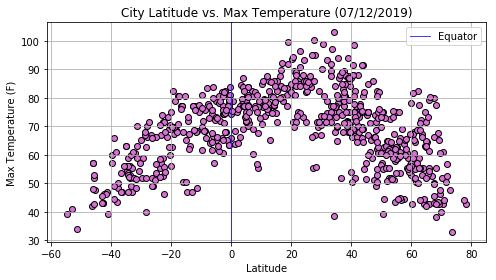

In [9]:
# Set-up the plot and the figure size
fig,ax = plt.subplots(figsize=(7,4))
# Create scatter plot using latitude as the x-axis and maximum temperature as the y-axis
ax.scatter(weather_df["Lat"],weather_df["Max Temp"],color='orchid',edgecolors="black")

# Label the equator line for better visibility
equator = ax.axvline(x=0,lw=0.75,color="blue",label="Equator")
ax.legend(handles=[equator],loc="best")

# Title the plot
ax.set_title(f"City Latitude vs. Max Temperature ({date})")
# Label both of the axis accordingly
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
# Add gridlines
ax.grid()

# Use tight_layout to automatically adjust params
plt.tight_layout()
# Save the figure as .png
plt.savefig('Latitude_v_Max_Temp.png')
# Display the figure
plt.show()

### Latitude vs. Humidity Plot

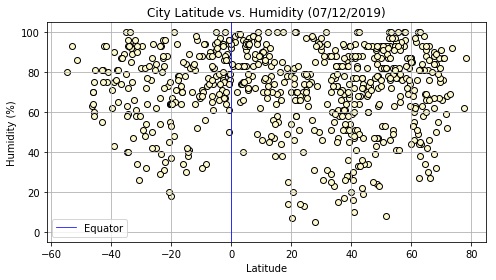

In [10]:
# Set-up the plot and the figure size
fig,ax = plt.subplots(figsize=(7,4))
# Create scatter plot using latitude as the x-axis and humidity % as the y-axis
ax.scatter(weather_df["Lat"],weather_df["Humidity"],color='lemonchiffon',edgecolors="black")
# Set y-limit to ensure all percentages range from 0 to 100 (with +/- 5 for plot clarity)
ax.set_ylim(-5,105)

# Label the equator line for better visibility
equator = ax.axvline(x=0,lw=0.75,color="blue",label="Equator")
ax.legend(handles=[equator],loc="best")

# Title the plot
ax.set_title(f"City Latitude vs. Humidity ({date})")
# Label both of the axis accordingly
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
# Add gridlines
ax.grid()

# Use tight_layout to automatically adjust params
plt.tight_layout()
# Save the figure as .png
plt.savefig('Latitude_v_Humidity.png')
# Display the figure
plt.show()

### Latitude vs. Cloudiness Plot

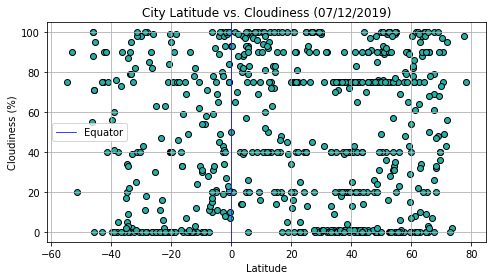

In [11]:
# Set-up the plot and the figure size
fig,ax = plt.subplots(figsize=(7,4))
# Create scatter plot using latitude as the x-axis and cloudiness % as the y-axis
ax.scatter(weather_df["Lat"],weather_df["Cloudiness"],color='lightseagreen',edgecolors="black")
# Set y-limit to ensure all percentages range from 0 to 100 (with +/- 5 for plot clarity)
ax.set_ylim(-5,105)

# Label the equator line for better visibility
equator = ax.axvline(x=0,lw=0.75,color="blue",label="Equator")
ax.legend(handles=[equator],loc="best")

# Title the plot
ax.set_title(f"City Latitude vs. Cloudiness ({date})")
# Label both of the axis accordingly
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
# Add gridlines
ax.grid()

# Use tight_layout to automatically adjust params
plt.tight_layout()
# Save the figure as .png
plt.savefig('Latitude_v_Cloudiness.png')
# Display the figure
plt.show()

### Latitude vs. Wind Speed Plot

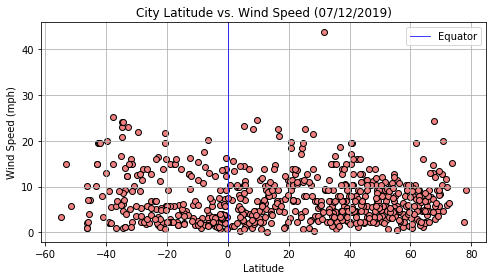

In [12]:
# Set-up the plot and the figure size
fig,ax = plt.subplots(figsize=(7,4))
# Create scatter plot using latitude as the x-axis and wind speed in mph as the y-axis
ax.scatter(weather_df["Lat"],weather_df["Wind Speed"],color='lightcoral',edgecolors="black")

# Label the equator line for better visibility
equator = ax.axvline(x=0,lw=0.75,color="blue",label="Equator")
ax.legend(handles=[equator],loc="best")

# Title the plot
ax.set_title(f"City Latitude vs. Wind Speed ({date})")
# Label both of the axis accordingly
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
# Add gridlines
ax.grid()

# Use tight_layout to automatically adjust params
plt.tight_layout()
# Save the figure as .png
plt.savefig('Latitude_v_Wind_Speed.png')
# Display the figure
plt.show()